Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd


Importing the COVID dataset for the state of Maharashtra

In [2]:
df = pd.read_csv(r"/Users/vidushigupta/Desktop/Vidushi/COVID dataset/district_wise.csv")
df.head()

SlNo State_Code                        State                 District_Key  \
0     0         UN             State Unassigned                UN_Unassigned   
1     1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   
3     3         AN  Andaman and Nicobar Islands             AN_South Andaman   
4     0         AP               Andhra Pradesh          AP_Foreign Evacuees   

                   District  Confirmed  Active  Recovered  Deceased  \
0                Unassigned       8898    8898          0         0   
1                  Nicobars          0       0          0         0   
2  North and Middle Andaman          1       0          1         0   
3             South Andaman         35       3         32         0   
4          Foreign Evacuees        287     241         46         0   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
0               0              224           224                0   
1               0                0             0                0   
2               0                0             0                0   
3               0                0             0                0   
4               0                0             0                0   

   Delta_Deceased District_Notes  Last_Updated  
0               0            NaN           NaN  
1               0            NaN           NaN  
2               0            NaN           NaN  
3               0            NaN           NaN  
4               0            NaN           NaN

Preparing and cleaning data for visualization

In [3]:
df_1=df.loc[df['State_Code'] == 'MH']
df_1.reset_index(level=0, inplace=True)
df_1.head()

index  SlNo State_Code        State   District_Key    District  Confirmed  \
0    330   369         MH  Maharashtra  MH_Ahmednagar  Ahmednagar        255   
1    331   370         MH  Maharashtra       MH_Akola       Akola       1126   
2    332   371         MH  Maharashtra    MH_Amravati    Amravati        386   
3    333   372         MH  Maharashtra  MH_Aurangabad  Aurangabad       3064   
4    334   374         MH  Maharashtra        MH_Beed        Beed         82   

   Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
0      45        198        12               0                0             0   
1     395        674        56               1                0             0   
2      86        273        27               0                0             0   
3    1220       1676       168               0                0             0   
4      24         56         2               0                0             0   

   Delta_Recovered  Delta_Deceased District_Notes  Last_Updated  
0                0               0            NaN           NaN  
1                0               0            NaN           NaN  
2                0               0            NaN           NaN  
3                0               0            NaN           NaN  
4                0               0            NaN           NaN

Importing the shapefile for the map of Maharashtra

In [4]:
fp = "/Users/vidushigupta/Desktop/Vidushi/COVID dataset/maharashtra_district/maharashtra_district.shp"
map_df = gpd.read_file(fp)

In [5]:
map_df=map_df[['district', 'geometry']] 
map_df.head()

district                                           geometry
0  Garhchiroli  POLYGON ((80.56275 20.82099, 80.55763 20.81677...
1      Gondiya  POLYGON ((80.66342 21.33138, 80.66484 21.32999...
2        Latur  POLYGON ((76.99537 18.82738, 77.00005 18.81915...
3         Pune  POLYGON ((74.83388 18.33920, 74.83266 18.32908...
4   Sindhudurg  MULTIPOLYGON (((73.78337 16.65974, 73.78814 16...

In [6]:
map_df=map_df.sort_values('district')
map_df.reset_index(level=0, inplace=True)
map_df.drop('index', axis=1, inplace=True)
map_df.head()

district                                           geometry
0  Ahmadnagar  POLYGON ((74.67333 19.94670, 74.67393 19.93509...
1       Akola  POLYGON ((77.61612 20.75991, 77.61167 20.75865...
2    Amravati  POLYGON ((78.34151 21.58875, 78.34678 21.58112...
3  Aurangabad  POLYGON ((75.88953 20.56336, 75.88833 20.56141...
4    Bhandara  POLYGON ((79.92223 21.52415, 79.92438 21.51988...

In [7]:
df_2=df_1[['District','Confirmed','Active','Recovered','Deceased']]
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
4        Beed         82      24         56         2

In [8]:
df_2.at[27,'District']= 'Raigarh'
df_2.at[4,'District']= 'Bid'
df_2 = df_2.drop([23 , 37])
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
4         Bid         82      24         56         2

In [9]:
df_2.reset_index(level=0, inplace=True)
df_2.drop('index', axis=1, inplace=True)
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
4         Bid         82      24         56         2

In [10]:
df_2.at[32,'Active']= 13241
df_2.at[32,'Recovered']= 9948
df_2.at[32,'Deceased']= 756

In [11]:
df_2=df_2.sort_values('District')
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
5    Bhandara         58      17         41         0

In [12]:
df_2.reset_index(level=0, inplace=True)
df_2.drop('index', axis=1, inplace=True)
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
4    Bhandara         58      17         41         0

In [13]:
df_2.at[32,'Confirmed']= 23946

In [14]:
df_2 = df_2.drop(23)

In [15]:
df_2.reset_index(level=0, inplace=True)
df_2.drop('index', axis=1, inplace=True)
df_2.head()

District  Confirmed  Active  Recovered  Deceased
0  Ahmednagar        255      45        198        12
1       Akola       1126     395        674        56
2    Amravati        386      86        273        27
3  Aurangabad       3064    1220       1676       168
4    Bhandara         58      17         41         0

In [16]:
merged = map_df.join(df_2)
merged.head()

district                                           geometry    District  \
0  Ahmadnagar  POLYGON ((74.67333 19.94670, 74.67393 19.93509...  Ahmednagar   
1       Akola  POLYGON ((77.61612 20.75991, 77.61167 20.75865...       Akola   
2    Amravati  POLYGON ((78.34151 21.58875, 78.34678 21.58112...    Amravati   
3  Aurangabad  POLYGON ((75.88953 20.56336, 75.88833 20.56141...  Aurangabad   
4    Bhandara  POLYGON ((79.92223 21.52415, 79.92438 21.51988...    Bhandara   

   Confirmed  Active  Recovered  Deceased  
0        255      45        198        12  
1       1126     395        674        56  
2        386      86        273        27  
3       3064    1220       1676       168  
4         58      17         41         0

Checking the plot of the Shapefile

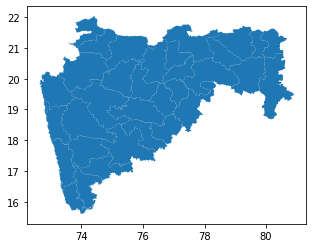

In [17]:
map_df.plot()

In [18]:
merged.describe()

Confirmed        Active     Recovered     Deceased
count     35.000000     35.000000     35.000000    35.000000
mean    3440.057143   1537.714286   1738.228571   163.742857
std    11299.642217   5140.821327   5625.347707   571.258844
min        0.000000      0.000000      0.000000     0.000000
25%       92.000000     32.500000     71.000000     3.000000
50%      266.000000     82.000000    195.000000    12.000000
75%     1140.000000    442.500000    662.500000    53.500000
max    62875.000000  27700.000000  31856.000000  3311.000000

Plotting maps of Maharastra

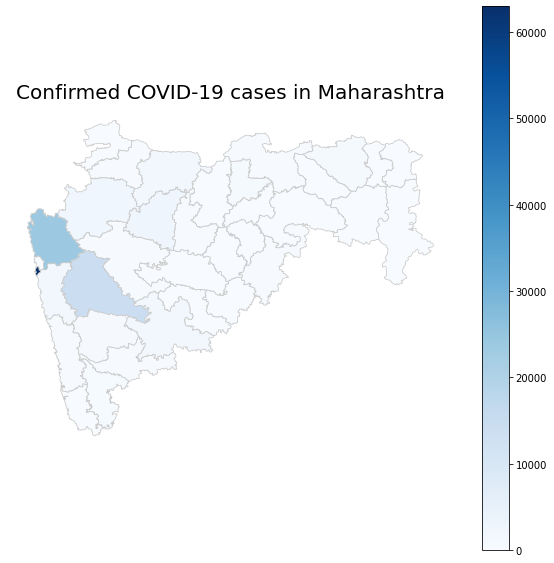

In [19]:
variable = 'Confirmed'
vmin, vmax = 0, 63000
fig, ax = plt.subplots(1, figsize=(10, 10))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Confirmed COVID-19 cases in Maharashtra', fontdict={'fontsize': '20', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


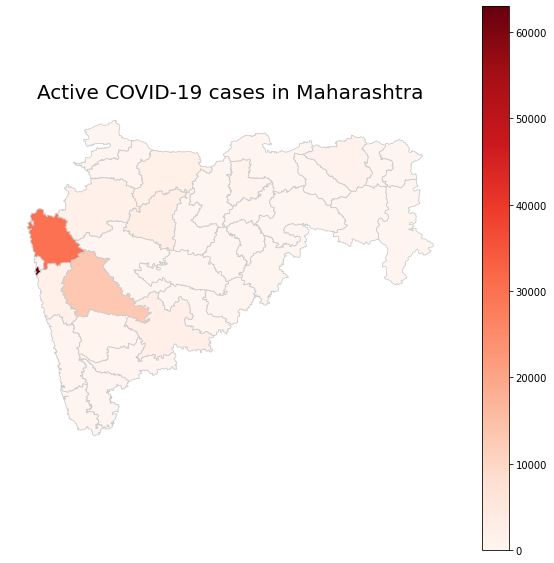

In [20]:
variable = 'Active'
vmin, vmax = 0, 63000
fig, ax = plt.subplots(1, figsize=(10, 10))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Active COVID-19 cases in Maharashtra', fontdict={'fontsize': '20', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


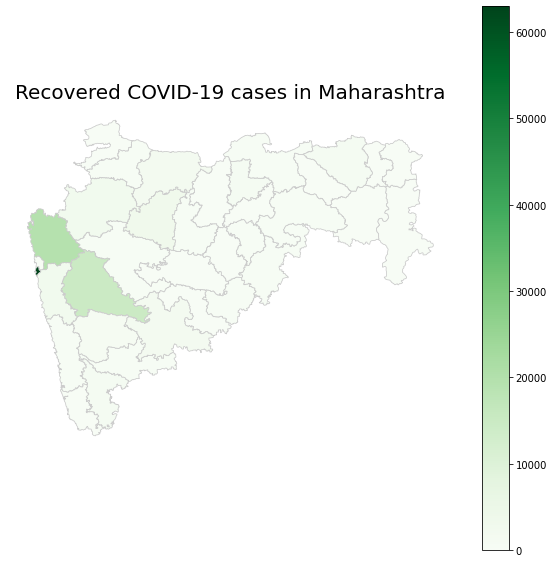

In [21]:
variable = 'Recovered'
vmin, vmax = 0, 63000
fig, ax = plt.subplots(1, figsize=(10, 10))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Recovered COVID-19 cases in Maharashtra', fontdict={'fontsize': '20', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


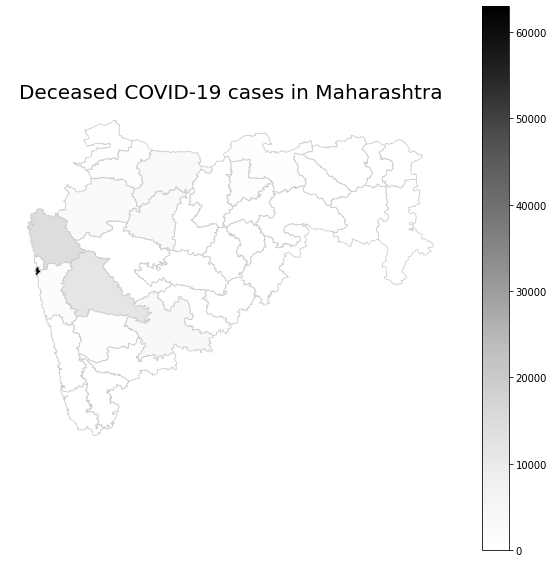

In [22]:
variable = 'Deceased'
vmin, vmax = 0, 63000
fig, ax = plt.subplots(1, figsize=(10, 10))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Deceased COVID-19 cases in Maharashtra', fontdict={'fontsize': '20', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)